In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.pipeline import make_pipeline

#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso


In [306]:
df = pd.read_csv('AB_NYC_2019.csv',index_col=1)

In [307]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
name,,,,,,,,,,,,,,,
Clean & quiet apt home by the park,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
Skylit Midtown Castle,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
THE VILLAGE OF HARLEM....NEW YORK !,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
Cozy Entire Floor of Brownstone,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
Entire Apt: Spacious Studio/Loft by central park,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [308]:
df.shape

(48895, 15)

In [309]:
# Checking datatypes
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [310]:
# Checking null values
df.isnull().sum()

id                                    0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [311]:
# Dropping unnecessary columns,
df.drop(['host_name','last_review','host_id','id'], axis=1, inplace=True)

In [312]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
name,,,,,,,,,,,
Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [313]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

C:\Users\admin\.conda\envs\mldl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group')

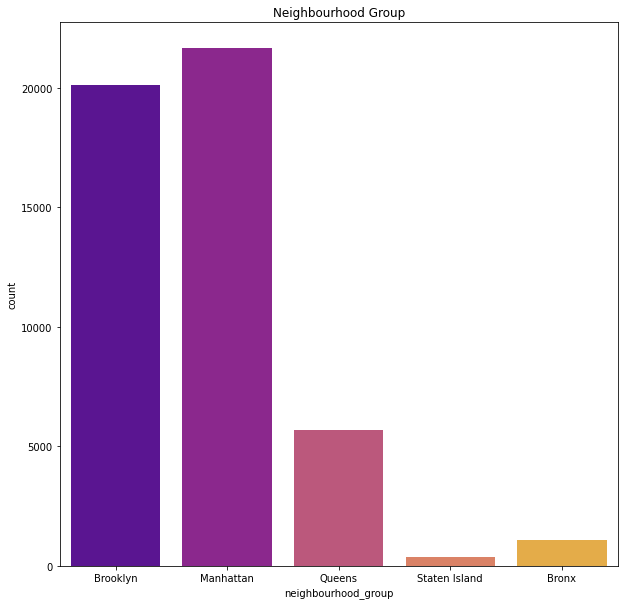

In [314]:
sn.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

In [315]:
des = df.describe()
#des.drop(['id, host_id'], axis = 1)
#des = des.drop(['id', 'host_id'], axis = 1)
des = des.round(2)
des

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,40.73,-73.95,152.72,7.03,23.27,1.09,7.14,112.78
std,0.05,0.05,240.15,20.51,44.55,1.60,32.95,131.62
min,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,40.69,-73.98,69.00,1.00,1.00,0.04,1.00,0.00
50%,40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

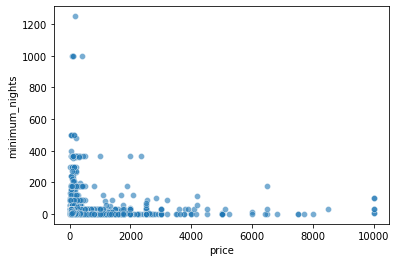

In [166]:
sns.scatterplot(data=df, x="price", y="minimum_nights", alpha = 0.6)

In [167]:
df['price_log'] = np.log(df.price+1)

<AxesSubplot:xlabel='price_log', ylabel='minimum_nights'>

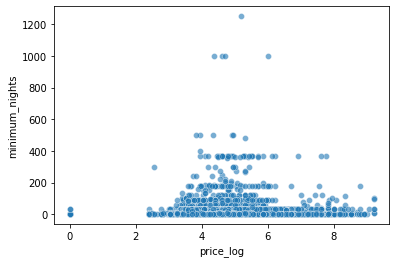

In [168]:
sns.scatterplot(data=df, x="price_log", y="minimum_nights", alpha = 0.6, )

C:\Users\admin\.conda\envs\mldl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

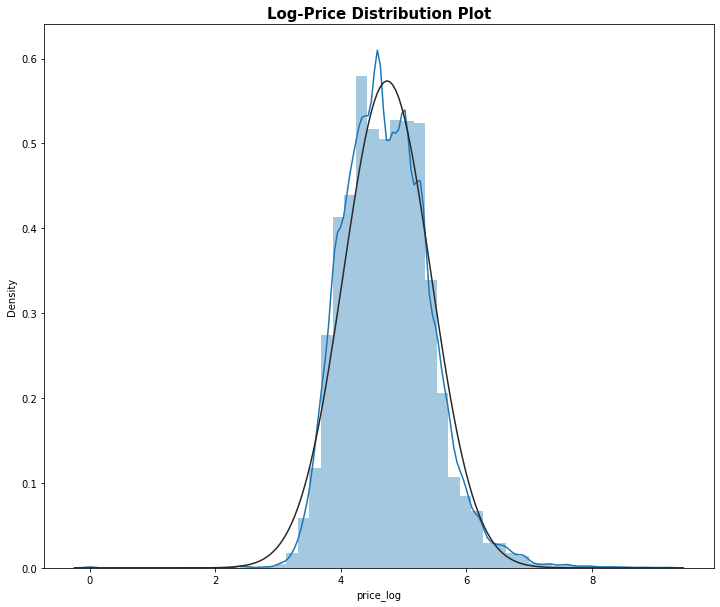

In [169]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [170]:
df.drop(['price'], axis=1, inplace=True)

In [171]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
name,,,,,,,,,,,
Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,5.010635
Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,5.420535
THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1,365,5.017280
Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,4.499810
Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,4.394449


In [172]:
df_encode = pd.get_dummies(df, columns = ['neighbourhood_group','room_type'])

In [173]:
df_encode.head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
name,,,,,,,,,,,,,,,,,
Clean & quiet apt home by the park,Kensington,40.64749,-73.97237,1,9,0.21,6,365,5.010635,0,1,0,0,0,0,1,0
Skylit Midtown Castle,Midtown,40.75362,-73.98377,1,45,0.38,2,355,5.420535,0,0,1,0,0,1,0,0
THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.80902,-73.94190,3,0,0.00,1,365,5.017280,0,0,1,0,0,0,1,0
Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,1,270,4.64,1,194,4.499810,0,1,0,0,0,1,0,0
Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,10,9,0.10,1,0,4.394449,0,0,1,0,0,1,0,0


In [195]:
df_final = df_encode.drop(['neighbourhood'],axis = 1)

<AxesSubplot:>

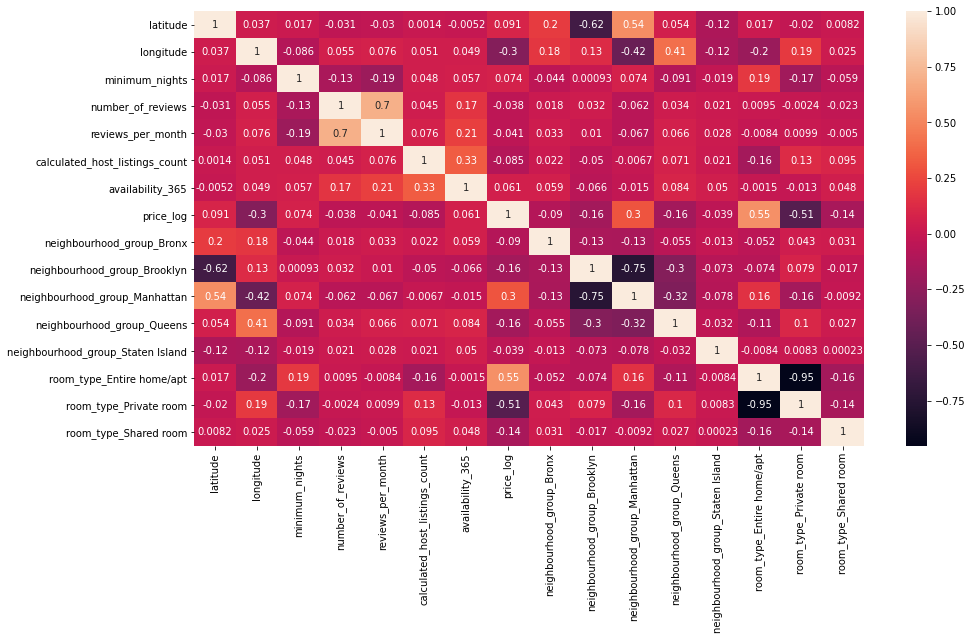

In [191]:
corr = df_encode.corr(method='kendall')
plt.figure(figsize=(15,8))
sn.heatmap(corr, annot=True)
#df.columns

In [192]:
df_encode[df_encode.columns[1:]].corr()['price_log'][:]

latitude                             0.079339
longitude                           -0.325043
minimum_nights                       0.033185
number_of_reviews                   -0.042801
reviews_per_month                   -0.060625
calculated_host_listings_count       0.132274
availability_365                     0.098558
price_log                            1.000000
neighbourhood_group_Bronx           -0.104333
neighbourhood_group_Brooklyn        -0.192346
neighbourhood_group_Manhattan        0.347058
neighbourhood_group_Queens          -0.182790
neighbourhood_group_Staten Island   -0.044101
room_type_Entire home/apt            0.613843
room_type_Private room              -0.563049
room_type_Shared room               -0.172293
Name: price_log, dtype: float64

In [290]:
X = df_final.drop(['price_log'],axis =1)
y = df_encode['price_log']
#X.head()

In [291]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [227]:
rfr = RandomForestRegressor(n_estimators=250)

In [228]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=250)

In [229]:
Rfr_test_MSE = mean_squared_error(y_test,rfc.predict(X_test), squared = False)
Rfr_test_MSE

0.42999005782806615

In [250]:
param_grid = { 
    'n_estimators': [100,150,200, 250,300,500],
    'max_features': np.arange(1,15),
    'max_depth' : np.arange(1,20),
    'random_state':[0]
}

In [251]:
rfr_cv = RandomizedSearchCV(rfr, param_distributions = param_grid, cv = 5, scoring = 'neg_mean_squared_error',verbose = 3, n_jobs = 1)

In [252]:
rfr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=8, max_features=10, n_estimators=250, random_state=0; total time=  11.0s
[CV 2/5] END max_depth=8, max_features=10, n_estimators=250, random_state=0; total time=  11.1s
[CV 3/5] END max_depth=8, max_features=10, n_estimators=250, random_state=0; total time=  11.3s
[CV 4/5] END max_depth=8, max_features=10, n_estimators=250, random_state=0; total time=  11.2s
[CV 5/5] END max_depth=8, max_features=10, n_estimators=250, random_state=0; total time=  10.9s
[CV 1/5] END max_depth=8, max_features=2, n_estimators=500, random_state=0; total time=   6.6s
[CV 2/5] END max_depth=8, max_features=2, n_estimators=500, random_state=0; total time=   6.5s
[CV 3/5] END max_depth=8, max_features=2, n_estimators=500, random_state=0; total time=   6.6s
[CV 4/5] END max_depth=8, max_features=2, n_estimators=500, random_state=0; total time=   6.5s
[CV 5/5] END max_depth=8, max_features=2, n_estimators=500, random_state=0; tot

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=250),
                   n_jobs=1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 500],
                                        'random_state': [0]},
                   scoring='neg_mean_squared_error', verbose=3)

In [253]:
rfr_cv.best_params_

{'random_state': 0, 'n_estimators': 500, 'max_features': 8, 'max_depth': 15}

In [254]:
rfr_best = RandomForestRegressor(n_estimators=500, max_features = 8, max_depth = 15, random_state =0)

In [255]:
rfr_best.fit(X_train, y_train)
mean_squared_error(y_test, rfr_best.predict(X_test), squared = False)

0.4220574846395485

In [265]:
rfr_features=pd.DataFrame({'Features': df_final.drop(['price_log'],axis =1).columns, 'Feature_importance_Score': rfr_best.feature_importances_}).sort_values(by = ['Feature_importance_Score'],ascending = False,ignore_index  = True)
rfr_features

,Features,Feature_importance_Score
0,room_type_Entire home/apt,0.292243
1,longitude,0.162940
2,room_type_Private room,0.136081
3,latitude,0.120255
4,availability_365,0.073550
5,minimum_nights,0.049669
6,reviews_per_month,0.040400
7,neighbourhood_group_Manhattan,0.037688
8,number_of_reviews,0.033665
9,calculated_host_listings_count,0.031423


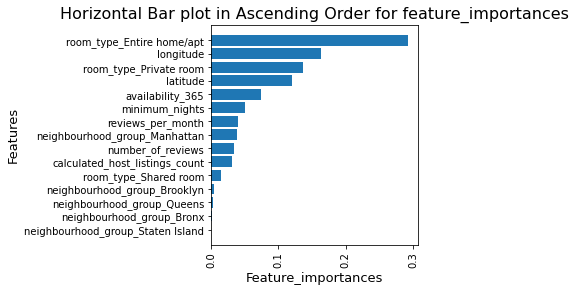

In [266]:
fig,ax = plt.subplots()
plt.barh('Features', 'Feature_importance_Score',data=rfr_features)
plt.xlabel("Feature_importances", size=13)
plt.ylabel("Features", size=13)
plt.xticks(rotation=90)
ax.invert_yaxis()
fig.tight_layout()
plt.title("Horizontal Bar plot in Ascending Order for feature_importances", size=16)
plt.show()

In [304]:
r2_score(y_test,rfr_best.predict(X_test))

0.816014665541672

In [267]:
LR = LinearRegression()

In [268]:
gs_LR = GridSearchCV(LR, param_grid={'fit_intercept':[True,False],'copy_X':[True, False]},cv=5, n_jobs=1,scoring='neg_mean_squared_error')
gs_LR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [271]:
gs_LR.best_params_ 

{'copy_X': True, 'fit_intercept': True}

In [272]:
LR = LinearRegression(fit_intercept= True, normalize = True)
LR.fit(X_train, y_train)
mean_squared_error(y_test, LR.predict(X_test), squared = False)

0.48645165048445266

In [299]:
r2_score(y_test,LR.predict(X_test))

0.49980686626647597

In [273]:
ridge = Ridge()
gs_ridge =  GridSearchCV(ridge, param_grid={'alpha':[1, 10]},cv=5, n_jobs=1,scoring='neg_mean_squared_error')
gs_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=1, param_grid={'alpha': [1, 10]},
             scoring='neg_mean_squared_error')

In [274]:
gs_ridge.best_params_

{'alpha': 10}

In [275]:
ridge_best = Ridge(alpha = 10)
ridge_best.fit(X_train, y_train)
mean_squared_error(y_test, ridge_best.predict(X_test), squared = False)

0.4864584331263023

In [300]:
r2_score(y_test,ridge_best.predict(X_test))

0.4997929176879059

In [276]:
lasso = Lasso()
gs_lasso =  GridSearchCV(lasso, param_grid={'alpha':[1, 10]},cv=5, n_jobs=1,scoring='neg_mean_squared_error')
gs_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=1, param_grid={'alpha': [1, 10]},
             scoring='neg_mean_squared_error')

In [277]:
gs_lasso.best_params_

{'alpha': 1}

In [302]:
Lasso_model = Lasso(alpha = 1)
Lasso_model.fit(X_train, y_train)
#Lasso_model.fit(X_train,y_train, **{'ExtraTrees__sample_weight': weights})
mean_squared_error(y_test,Lasso_model.predict(X_test), squared = False) 

0.6879440154768739

In [303]:
r2_score(y_test,Lasso_model.predict(X_test))

-0.0003789789921835318

In [286]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [287]:
lr = LinearRegression(copy_X= True, fit_intercept = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

MAE: 0.336228
RMSE: 0.466003
R2 0.540976


In [288]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

MAE: 0.336054
RMSE: 0.466158
R2 0.540669


In [289]:
Lasso_model.fit(X_train, y_train)
lasso_pred = Lasso_model.predict(X_test)

print('MAE: %f'% mean_absolute_error(y_test, lasso_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lasso_pred)))   
print('R2 %f' % r2_score(y_test, lasso_pred))


MAE: 0.546532
RMSE: 0.687944
R2 -0.000379
